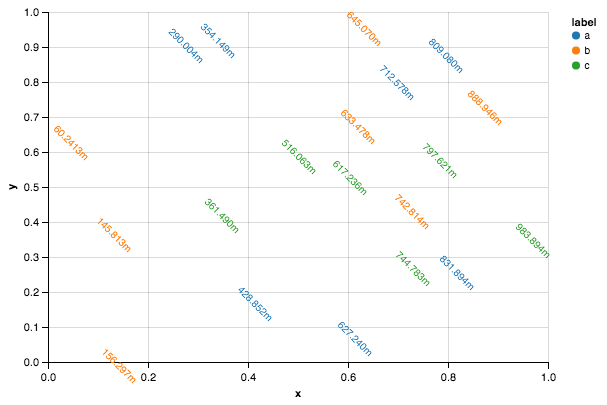

In [61]:
import numpy as np
import pandas as pd
np.random.seed(1974)

# Generate Data
num = 20
x, y = np.random.random((2, num))
labels = np.random.choice(['a', 'b', 'c'], num)
df = pd.DataFrame(dict(x=x, y=y, label=labels))
from altair import Chart
c = Chart(df)
c.mark_circle().encode(x='x', y='y', color='label')
c.mark_text(angle=45, dy=10).encode(x='x', y='y', color='label', text='x')

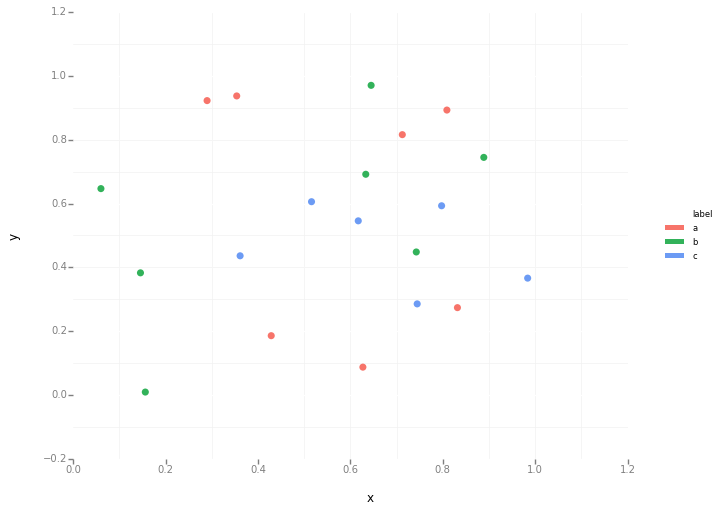

<ggplot: (285068329)>

In [6]:
from ggplot import *
ggplot(aes(x='x', y='y', color='label'), data=df) +\
    geom_point(size=50) +\
    theme_bw()

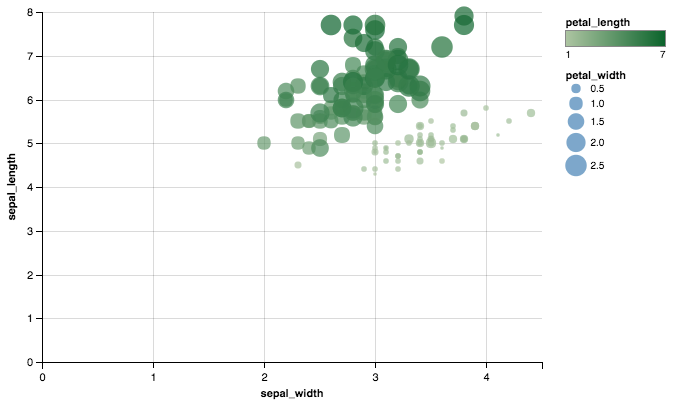

In [7]:
from altair import Chart
import seaborn as sns
iris = sns.load_dataset("iris")
c = Chart(iris)
c.mark_circle().encode(
    x='sepal_width',
    y='sepal_length',
    color='petal_length',
    size='petal_width',
)

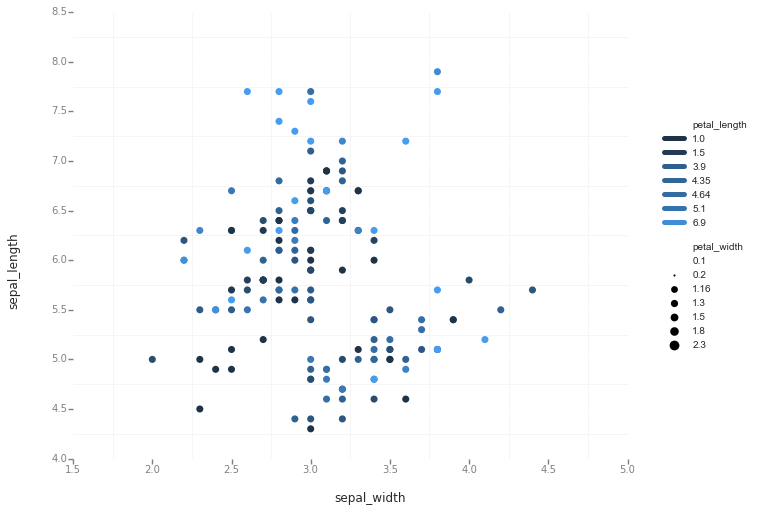

<ggplot: (285555421)>

In [8]:
ggplot(aes(x='sepal_width', y='sepal_length', color='petal_length', size='petal_width'), data=iris) +\
    geom_point(size=50) +\
    theme_bw()

In [69]:
import pandas as pd
import numpy as np

df= pd.DataFrame({'id':range(10),
                 "publications":np.random.choice(range(10), 10)})

In [70]:
df.head()

,id,publications
0,0,9
1,1,5
2,2,3
3,3,0
4,4,0


In [87]:
from altair import *

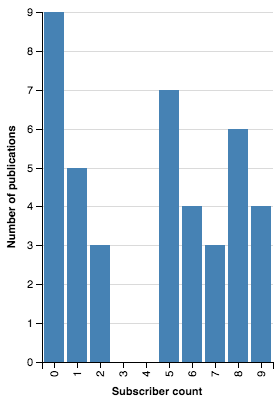

In [105]:
chart = Chart(df)
c1 = Chart(df).configure(background='white').mark_bar().encode(
    X('id:N', title='Subscriber count'),
    Y('publications:Q', title='Number of publications')
)
c2 = Chart(df).configure(background='white',numberFormat="0.1f" ).mark_text(angle=-90, dx=10).encode(
    X('id:N', title='Subscriber count'),
    Y('publications:Q', title='Number of publications'),
    text='publications:Q'
)


chart.layers = [c1, c2]
#chart.configure(numberFormat="0.1f")
#chart
c1

In [113]:
c = c1+c2
c.data = 'df'
c.to_json()

'{"data": {"url": "df"}, "layers": [{"config": {"background": "white"}, "data": {"values": [{"id": 0, "publications": 9}, {"id": 1, "publications": 5}, {"id": 2, "publications": 3}, {"id": 3, "publications": 0}, {"id": 4, "publications": 0}, {"id": 5, "publications": 7}, {"id": 6, "publications": 4}, {"id": 7, "publications": 3}, {"id": 8, "publications": 6}, {"id": 9, "publications": 4}]}, "encoding": {"x": {"field": "id", "title": "Subscriber count", "type": "nominal"}, "y": {"field": "publications", "title": "Number of publications", "type": "quantitative"}}, "mark": "bar"}, {"config": {"background": "white", "mark": {"angle": -90.0, "dx": 10.0}, "numberFormat": "0.1f"}, "data": {"values": [{"id": 0, "publications": 9}, {"id": 1, "publications": 5}, {"id": 2, "publications": 3}, {"id": 3, "publications": 0}, {"id": 4, "publications": 0}, {"id": 5, "publications": 7}, {"id": 6, "publications": 4}, {"id": 7, "publications": 3}, {"id": 8, "publications": 6}, {"id": 9, "publications": 4

In [112]:
c1.to_altair()

"Chart().mark_bar().encode(\n    x=X(u'id:N',\n        title=u'Subscriber count',\n    ),\n    y=Y(u'publications:Q',\n        title=u'Number of publications',\n    ),\n).configure(\n    background=u'white',\n)"

In [55]:
c1 = Chart(df).mark_bar().encode(
    X('user_id', bin=True),
    y='count(*):Q'
)

c2 = Chart(df).mark_text().encode(
    X('user_id', bin=True),
    y='C:Q',
    text='C:Q'
).transform_data(
    calculate=[Formula('C', 'count(*):Q')],
)

In [56]:
c2.to_json()

'{"data": {"values": [{"name": "a", "user_id": 6}, {"name": "e", "user_id": 9}, {"name": "b", "user_id": 0}, {"name": "e", "user_id": 0}, {"name": "a", "user_id": 9}, {"name": "b", "user_id": 4}, {"name": "e", "user_id": 4}, {"name": "d", "user_id": 0}, {"name": "c", "user_id": 0}, {"name": "b", "user_id": 3}]}, "encoding": {"text": {"field": "C", "type": "quantitative"}, "x": {"bin": true, "field": "user_id", "type": "quantitative"}, "y": {"field": "C", "type": "quantitative"}}, "mark": "text", "transform": {"calculate": [{"expr": "count(*):Q", "field": "C"}]}}'

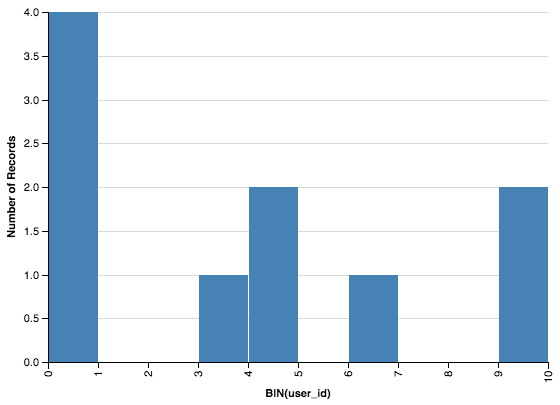

In [58]:
c1

In [114]:
from IPython.display import HTML

In [115]:
HTML("""
<!DOCTYPE html>
<head>
  <title>Vega-Lite Chart</title>
  <meta charset="utf-8">

  <script src="https://d3js.org/d3.v3.min.js"></script>
  <script src="https://vega.github.io/vega/vega.js"></script>
  <script src="https://vega.github.io/vega-lite/vega-lite.js"></script>
  <script src="https://vega.github.io/vega-editor/vendor/vega-embed.js" charset="utf-8"></script>

  <style media="screen">
    /* Add space between vega-embed links  */
    .vega-actions a {
      margin-right: 5px;
    }
  </style>
</head>
<body>
  <!-- Container for the visualization -->
  <div id="vis"></div>

  <script>
  var vlSpec = {
    "data": {
        "values": [
            {
                "Wins": 8,
                "a": "thing 1"
            },
            {
                "Wins": 9,
                "a": "thing 2"
            },
            {
                "Wins": 7,
                "a": "thing 3"
            },
            {
                "Wins": 9,
                "a": "thing 4"
            }
        ]
    },
    "encoding": {
        "y": {
            "type": "quantitative",
            "field": "Wins"
        },
        "x": {
            "type": "nominal",
            "field": "a"
        }
    },
    "mark": "bar"
}

  var embedSpec = {
    mode: "vega-lite",  // Instruct Vega-Embed to use the Vega-Lite compiler
    spec: vlSpec
  };

  // Embed the visualization in the container with id `vis`
  vg.embed("#vis", embedSpec, function(error, result) {
    // Callback receiving the View instance and parsed Vega spec
    // result.view is the View, which resides under the '#vis' element
  });
  </script>
</body>
</html>""")